Q.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import requests
import io

In [5]:
# Step 1: Download and Extract the Data
url = 'https://files.consumerfinance.gov/ccdb/complaints.csv.zip'
response = requests.get(url)
zip_file = ZipFile(io.BytesIO(response.content))
csv_file = zip_file.open('complaints.csv')

In [6]:
# Step 2: Load and Explore the Data
df = pd.read_csv(csv_file)
print(df.head())
print(df.info())

C:\Users\jithe\AppData\Local\Temp\ipykernel_6244\4175356086.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


  Date received                                            Product  \
0    2024-05-16  Credit reporting or other personal consumer re...   
1    2024-05-16  Credit reporting or other personal consumer re...   
2    2024-05-04  Credit reporting or other personal consumer re...   
3    2024-05-16  Credit reporting or other personal consumer re...   
4    2024-05-16  Credit reporting or other personal consumer re...   

        Sub-product                                              Issue  \
0  Credit reporting               Incorrect information on your report   
1  Credit reporting               Incorrect information on your report   
2  Credit reporting  Problem with a company's investigation into an...   
3  Credit reporting                        Improper use of your report   
4  Credit reporting  Problem with a company's investigation into an...   

                                           Sub-issue  \
0                      Account information incorrect   
1                Infor

In [7]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",MI,48228,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025658
1,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30315,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025656
2,2024-05-04,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,FL,33139,NaN,NaN,Web,2024-05-04,In progress,Yes,NaN,8924799
3,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",GA,30144,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025651
4,2024-05-16,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",CT,06040,NaN,NaN,Web,2024-05-16,In progress,Yes,NaN,9025643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251121,2023-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,76036,NaN,Other,Web,2023-08-02,Closed with non-monetary relief,Yes,NaN,7337991
5251122,2023-08-02,"Payday loan, title loan, or personal loan",Installment loan,Problem with additional add-on products or ser...,NaN,NaN,NaN,NBT BANCORP INC.,NJ,08046,NaN,NaN,Phone,2023-08-02,Closed with explanation,Yes,NaN,7343156
5251123,2023-08-02,Mortgage,FHA mortgage,Struggling to pay mortgage,NaN,NaN,Company believes it acted appropriately as aut...,Chesmar Homes,TX,77316,NaN,Other,Web,2023-08-17,Closed with explanation,Yes,NaN,7340709
5251124,2023-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",GA,30013,NaN,Consent not provided,Web,2023-08-02,Closed with explanation,Yes,NaN,7341166


In [10]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 3
Sub-issue                        736321
Consumer complaint narrative    3411704
Company public response         2733501
Company                               0
State                             45801
ZIP code                          30225
Tags                            4764840
Consumer consent provided?      1042778
Submitted via                         0
Date sent to company                  0
Company response to consumer         15
Timely response?                      0
Consumer disputed?              4482810
Complaint ID                          0
dtype: int64

In [13]:
# Step 3: Clean the Data
# Handle missing values
df = df.dropna(subset=['Complaint ID', 'Date received', 'Product', 'Company'])

# Convert date columns to datetime
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

# Remove duplicates
df = df.drop_duplicates()

In [15]:
# Step 4: Analyze the Data
# Summary statistics
print(df.describe())

# Most common types of complaints
most_common_complaints = df['Product'].value_counts().head(10)
print(most_common_complaints)

# Companies with the most complaints
most_complained_companies = df['Company'].value_counts().head(10)
print(most_complained_companies)

# Trends over time
complaints_over_time = df.groupby(df['Date received'].dt.to_period('M')).size()
print(complaints_over_time)

       Complaint ID
count  1.787216e+06
mean   5.291931e+06
std    1.986614e+06
min    1.290155e+06
25%    3.505526e+06
50%    5.444806e+06
75%    7.030440e+06
max    8.966448e+06
Credit reporting, credit repair services, or other personal consumer reports    807293
Debt collection                                                                 248737
Credit reporting or other personal consumer reports                             227031
Mortgage                                                                        116570
Credit card or prepaid card                                                     108669
Checking or savings account                                                      93932
Student loan                                                                     42432
Money transfer, virtual currency, or money service                               39421
Vehicle loan or lease                                                            30442
Credit card                          

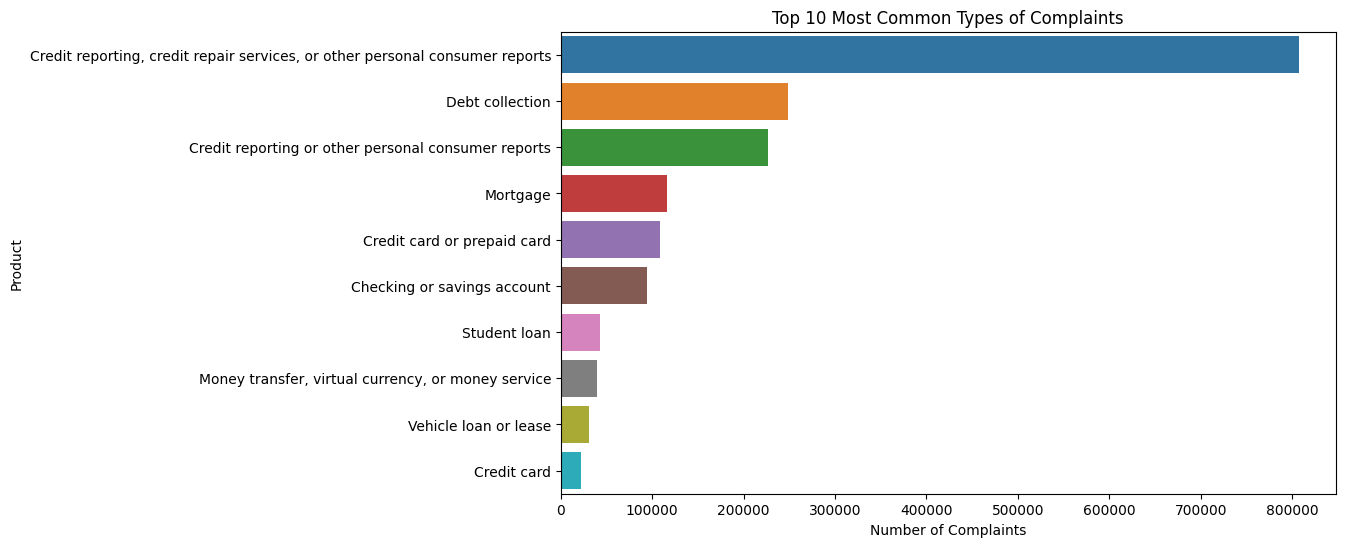

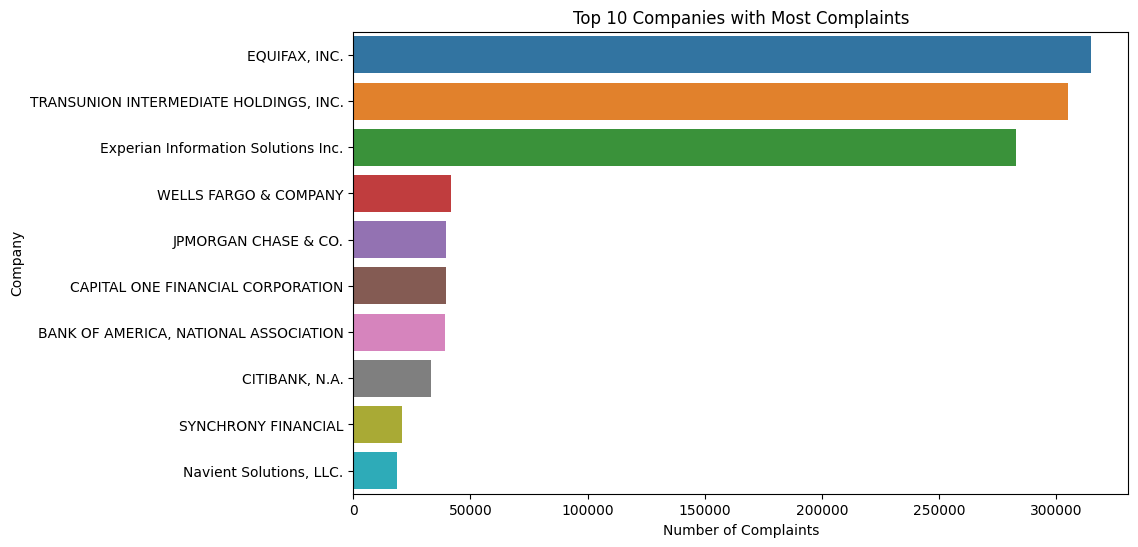

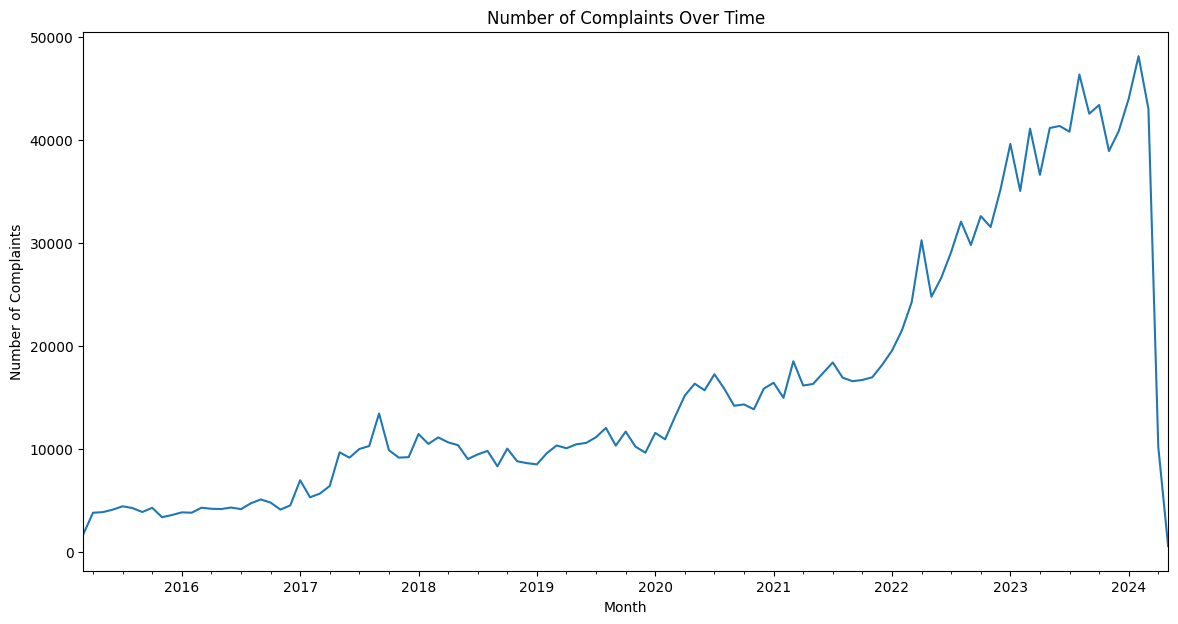

In [16]:
# Step 5: Visualize the Insights
# Most common types of complaints
plt.figure(figsize=(10, 6))
sns.barplot(x=most_common_complaints.values, y=most_common_complaints.index)
plt.title('Top 10 Most Common Types of Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.show()

# Companies with the most complaints
plt.figure(figsize=(10, 6))
sns.barplot(x=most_complained_companies.values, y=most_complained_companies.index)
plt.title('Top 10 Companies with Most Complaints')
plt.xlabel('Number of Complaints')
plt.ylabel('Company')
plt.show()

# Trends over time
plt.figure(figsize=(14, 7))
complaints_over_time.plot()
plt.title('Number of Complaints Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.show()

Q.2

In [2]:
def find_length_of_lcis(nums):
    if not nums:
        return 0
    
    max_length = 1
    current_length = 1
    
    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1
    
    return max_length

# Example usage:
print(find_length_of_lcis([1, 3, 5, 4, 7]))  # Output: 3
print(find_length_of_lcis([2, 2, 2, 2, 2]))  # Output: 1


3
1


Q.3

In [3]:
from functools import cmp_to_key

def largest_number(nums):
    # Convert numbers to strings
    nums_str = list(map(str, nums))
    
    # Define a comparator
    def compare(x, y):
        if x + y > y + x:
            return -1
        elif x + y < y + x:
            return 1
        else:
            return 0
    
    # Sort the numbers using the custom comparator
    nums_str.sort(key=cmp_to_key(compare))
    
    # Join the sorted numbers
    result = ''.join(nums_str)
    
    # Handle the case where the numbers are all zeros
    if result[0] == '0':
        return '0'
    
    return result

# Example usage:
print(largest_number([10, 2]))  # Output: "210"
print(largest_number([3, 30, 34, 5, 9]))  # Output: "9534330"


210
9534330


Q.4

In [31]:
import json
import csv

In [32]:
json_file_path = "C:\\Users\\jithe\\Downloads\\sample_json.json"

with open(json_file_path, 'r') as file:
        data = json.load(file)

In [33]:
# Load JSON data
data = json.loads(json_data)

In [34]:
# Extract 'servlet-name' and 'servlet-class'
servlets = data['web-app']['servlet']

In [35]:
# Define the CSV file path
csv_file_path = 'servlets.csv'

In [36]:
# Write to CSV
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['servlet-name', 'servlet-class'])
    # Write the data
    for servlet in servlets:
        writer.writerow([servlet['servlet-name'], servlet['servlet-class']])

print(f"Data has been written to {csv_file_path}")

Data has been written to servlets.csv
